In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.tri as tri
import numpy as np

In [2]:
def log_ratio_surf(c,r):
    if c == r:
        return 2*(r-1)
    else:
        return (1 - c*r) * ( r-1 + r*(c-1)/(r-c)*np.log(c/r) )**(-1) * np.log(c/r)

In [9]:
n_c, n_r = (20,20)
c_list = np.linspace(0.5, 2, n_c)
r_list = np.linspace(0.5, 2, n_r)

In [10]:
#X, Y = np.meshgrid(c_list, r_list)
#Z = np.array([[log_ratio_surf(y,x) for x in c_list] for y in r_list])
#Z_0 = np.array([[0 for x in c_list] for y in r_list])

In [11]:
X, Y, Z = np.array([]),np.array([]),np.array([]) 
Z_0 = np.array([])
#X_0down, Y_0down, Z_0down = [],[],[] 
for c in c_list:
    for r in r_list:
        X = np.append(X, c)
        Y = np.append(Y, r)
        lp = log_ratio_surf(c,r)
        Z = np.append(Z, lp)
        Z_0 = np.append(Z_0, 0)

In [14]:
triang = tri.Triangulation(X,Y)
X2 = X[triang.triangles].mean(axis=1) 
Y2 = Y[triang.triangles].mean(axis=1)
up_mask = np.array([log_ratio_surf(X2[i], Y2[i])>0 for i in range(len(X2))])
triang.set_mask(up_mask)

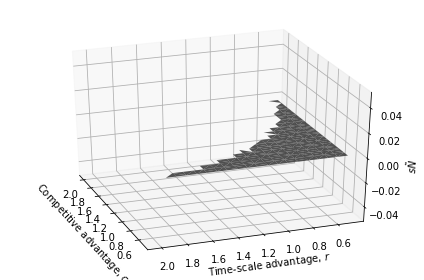

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.set_zlim([-1,1])
ax.set_xlabel(r"Competitive advantage, $c$")
ax.set_ylabel(r"Time-scale advantage, $r$")
ax.set_zlabel(r"$s \tilde{N}$")

#ax.plot_trisurf(X, Y, Z, color='green', alpha=0.9)


ax.plot_trisurf(triang, Z_0, color='grey', alpha=0.9)

ax.view_init(azim=-200)

plt.tight_layout()

In [16]:
def rotate(angle):
    ax.view_init(azim=angle)
    
fr = np.append(np.arange(181,269,1.5),np.arange(269,181,-1.5))
rot_animation = animation.FuncAnimation(fig, rotate, frames=fr,interval=50)

rot_animation.save('rotation.gif', dpi=70, writer='imagemagick')

In [51]:
fr

array([181. , 182.5, 184. , 185.5, 187. , 188.5, 190. , 191.5, 193. ,
       194.5, 196. , 197.5, 199. , 200.5, 202. , 203.5, 205. , 206.5,
       208. , 209.5, 211. , 212.5, 214. , 215.5, 217. , 218.5, 220. ,
       221.5, 223. , 224.5, 226. , 227.5, 229. , 230.5, 232. , 233.5,
       235. , 236.5, 238. , 239.5, 241. , 242.5, 244. , 245.5, 247. ,
       248.5, 250. , 251.5, 253. , 254.5, 256. , 257.5, 259. , 260.5,
       262. , 263.5, 265. , 266.5, 268. , 269. , 267.5, 266. , 264.5,
       263. , 261.5, 260. , 258.5, 257. , 255.5, 254. , 252.5, 251. ,
       249.5, 248. , 246.5, 245. , 243.5, 242. , 240.5, 239. , 237.5,
       236. , 234.5, 233. , 231.5, 230. , 228.5, 227. , 225.5, 224. ,
       222.5, 221. , 219.5, 218. , 216.5, 215. , 213.5, 212. , 210.5,
       209. , 207.5, 206. , 204.5, 203. , 201.5, 200. , 198.5, 197. ,
       195.5, 194. , 192.5, 191. , 189.5, 188. , 186.5, 185. , 183.5,
       182. ])